<a href="https://colab.research.google.com/github/gikirima/indonews-scrapper/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

In [15]:
df1 = pd.read_csv('https://raw.githubusercontent.com/gikirima/indonews-scrapper/refs/heads/main/misleading.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/gikirima/indonews-scrapper/refs/heads/main/dataset_fixLabeling.csv')

print(df1.head())
print(df2.head())

   Unnamed: 0                                                isi  \
0           0  Akun Facebook “Trie Sudirman” pada Rabu (4/6/2...   
1           1  Pada Minggu (1/6/2025) beredar sebuah pesan be...   
2           2  Pada Minggu (1/5/2025) beredar sebuah unggahan...   
3           3  \nAkun Tiktok “aliimranmaryam” pada Senin (7/1...   
4           4  Pada Sabtu (24/5/2025) akun Facebook “Andika S...   

                                               judul  \
0                      700 Kepala Desa Ditangkap KPK   
1  Pesan Berantai Proses Pembuatan Beras dari Bot...   
2  Penegasan Nadiem Makarim Berbagi Uang Pengadaa...   
3  Sertifikat Halal Produk McDonald’s Dicabut di ...   
4  Tautan Pendaftaran “Rekrutmen Program Literasi...   

                                                 url kategori_berita  \
0  https://turnbackhoax.id/2025/06/13/salah-700-k...         politik   
1  https://turnbackhoax.id/2025/06/12/salah-pesan...      lingkungan   
2  https://turnbackhoax.id/2025/06/12/

In [16]:
df1 = df1.drop(columns=['Unnamed: 0'])

In [17]:
print(df1.shape)
print(df2.shape)

(1000, 5)
(42765, 5)


In [25]:
# aggregate df1 df2
df = pd.concat([df1, df2]).reset_index(drop=True)
df.head()

,isi,judul,url,kategori_berita,clickbait_label
0,Akun Facebook “Trie Sudirman” pada Rabu (4/6/2...,700 Kepala Desa Ditangkap KPK,https://turnbackhoax.id/2025/06/13/salah-700-k...,politik,misleading
1,Pada Minggu (1/6/2025) beredar sebuah pesan be...,Pesan Berantai Proses Pembuatan Beras dari Bot...,https://turnbackhoax.id/2025/06/12/salah-pesan...,lingkungan,misleading
2,Pada Minggu (1/5/2025) beredar sebuah unggahan...,Penegasan Nadiem Makarim Berbagi Uang Pengadaa...,https://turnbackhoax.id/2025/06/12/salah-peneg...,politik,misleading
3,\nAkun Tiktok “aliimranmaryam” pada Senin (7/1...,Sertifikat Halal Produk McDonald’s Dicabut di ...,https://turnbackhoax.id/2025/06/11/salah-serti...,bisnis,misleading
4,Pada Sabtu (24/5/2025) akun Facebook “Andika S...,Tautan Pendaftaran “Rekrutmen Program Literasi...,https://turnbackhoax.id/2025/06/09/penipuan-ta...,teknologi,misleading


In [27]:
df.shape

(43765, 5)

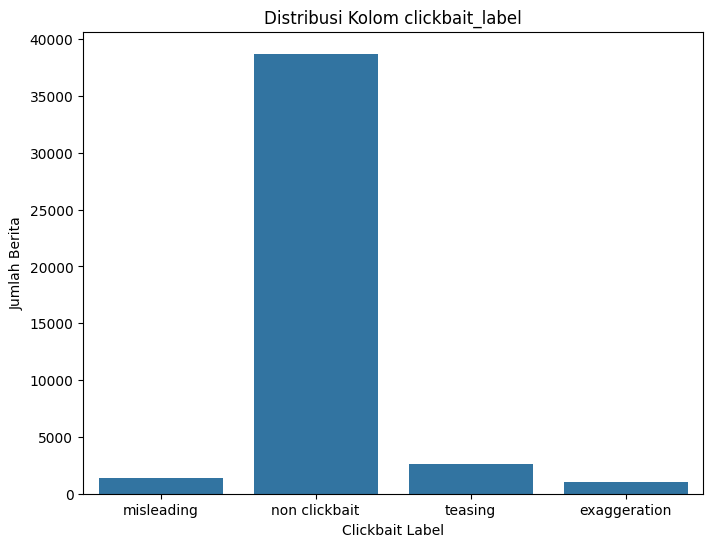

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='clickbait_label', data=df)
plt.title('Distribusi Kolom clickbait_label')
plt.xlabel('Clickbait Label')
plt.ylabel('Jumlah Berita')
plt.show()

In [30]:
# count
df['clickbait_label'].value_counts()

,count
clickbait_label,
non clickbait,38714
teasing,2607
misleading,1415
exaggeration,1029


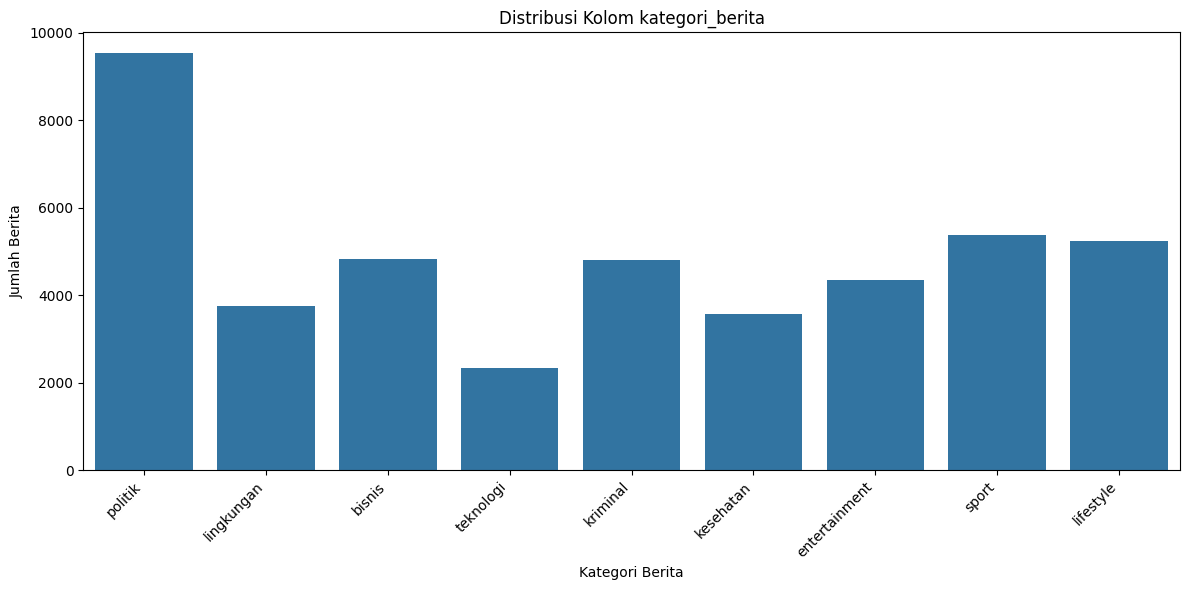

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6)) # Increase figure size to accommodate rotated labels
sns.countplot(x='kategori_berita', data=df)
plt.title('Distribusi Kolom kategori_berita')
plt.xlabel('Kategori Berita')
plt.ylabel('Jumlah Berita')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [45]:
from sklearn.utils import resample

# 1. Lihat distribusi awal
print("Distribusi clickbait_label:")
print(df['clickbait_label'].value_counts())
print("\nDistribusi kategori:")
print(df['kategori_berita'].value_counts())

# 2. Tentukan jumlah minimum sampel antar kelas clickbait
min_count = df['clickbait_label'].value_counts().min()

# 3. Simpan hasil di sini
df_balanced = []

# 4. Untuk setiap kelas clickbait
for label in df['clickbait_label'].unique():
    subset = df[df['clickbait_label'] == label]

    # Stratified undersampling berdasarkan kategori
    # Ambil proporsi kategori dalam subset ini
    kategori_counts = subset['kategori_berita'].value_counts(normalize=True)

    # Tentukan jumlah sampel dari setiap kategori untuk kelas ini
    sampled_parts = []
    for kategori, proporsi in kategori_counts.items():
        n_sample = int(round(proporsi * min_count))
        sampled = subset[subset['kategori_berita'] == kategori]
        if len(sampled) >= n_sample:
            sampled = sampled.sample(n=n_sample, random_state=42)
        else:
            sampled = resample(sampled, replace=True, n_samples=n_sample, random_state=42)
        sampled_parts.append(sampled)

    subset_balanced = pd.concat(sampled_parts)
    df_balanced.append(subset_balanced)

# 5. Gabungkan semua
df_result = pd.concat(df_balanced).reset_index(drop=True)

# 6. Cek distribusi akhir
print("\nDistribusi akhir clickbait_label:")
print(df_result['clickbait_label'].value_counts())
print("\nDistribusi akhir kategori:")
print(df_result['kategori_berita'].value_counts())

Distribusi clickbait_label:
clickbait_label
non clickbait    38714
teasing           2607
misleading        1415
exaggeration      1029
Name: count, dtype: int64

Distribusi kategori:
kategori_berita
politik          9534
sport            5370
lifestyle        5237
bisnis           4817
kriminal         4798
entertainment    4349
lingkungan       3746
kesehatan        3570
teknologi        2342
Name: count, dtype: int64

Distribusi akhir clickbait_label:
clickbait_label
misleading       1030
non clickbait    1030
exaggeration     1029
teasing          1028
Name: count, dtype: int64

Distribusi akhir kategori:
kategori_berita
lifestyle        822
entertainment    740
politik          650
kesehatan        439
bisnis           413
kriminal         399
sport            291
lingkungan       190
teknologi        173
Name: count, dtype: int64


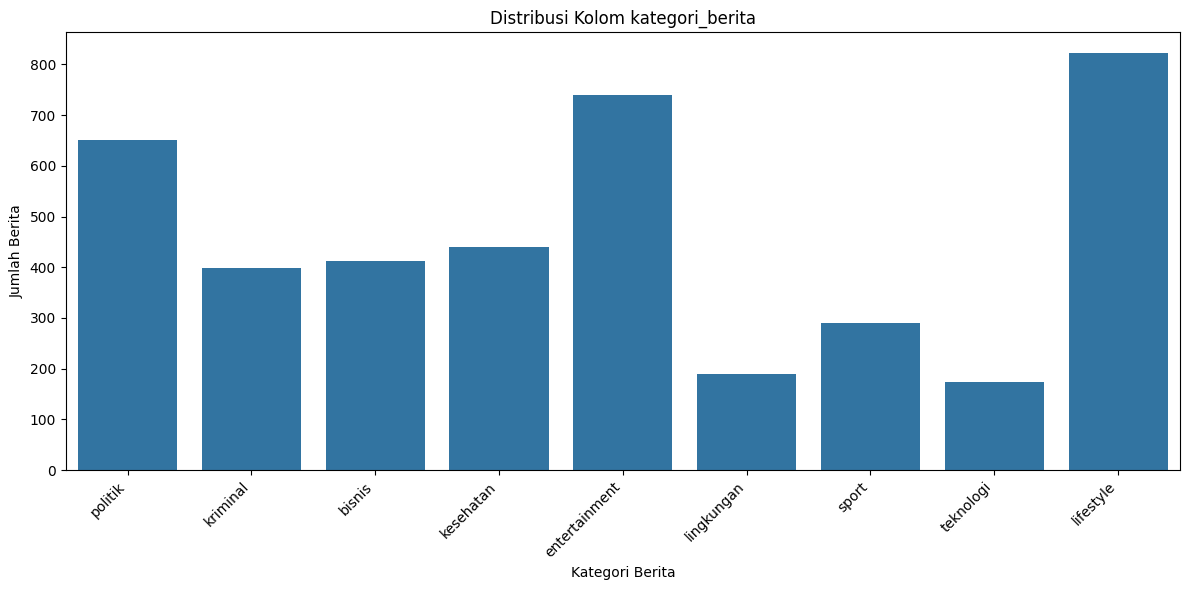

In [46]:
plt.figure(figsize=(12, 6)) # Increase figure size to accommodate rotated labels
sns.countplot(x='kategori_berita', data=df_result)
plt.title('Distribusi Kolom kategori_berita')
plt.xlabel('Kategori Berita')
plt.ylabel('Jumlah Berita')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

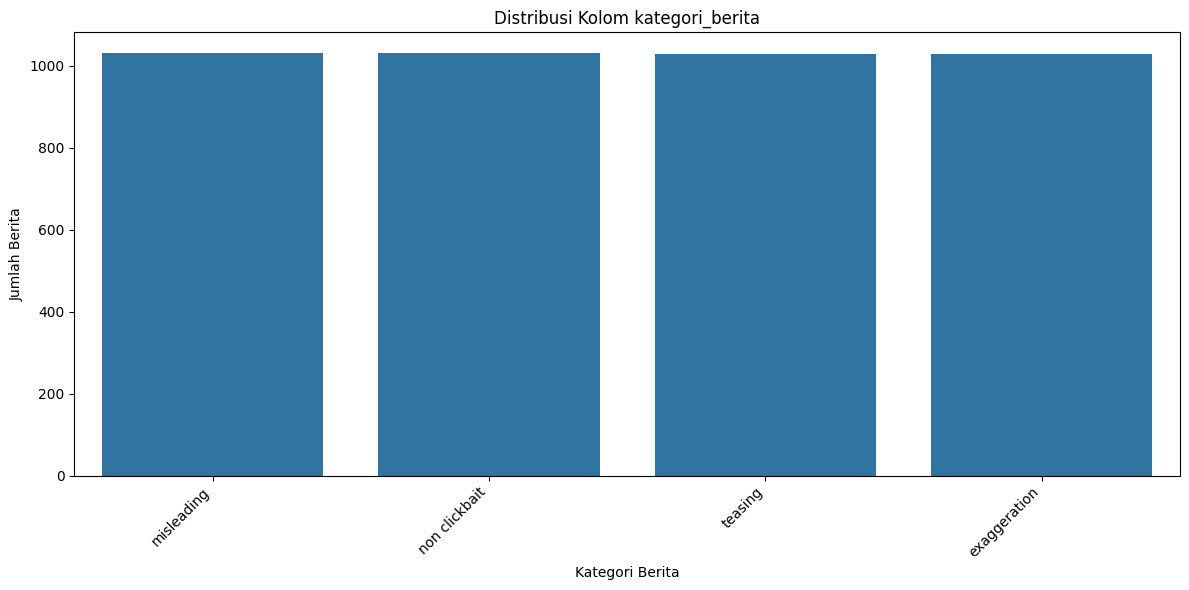

In [47]:
plt.figure(figsize=(12, 6)) # Increase figure size to accommodate rotated labels
sns.countplot(x='clickbait_label', data=df_result)
plt.title('Distribusi Kolom kategori_berita')
plt.xlabel('Kategori Berita')
plt.ylabel('Jumlah Berita')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [ ]:
# import google colba
from google.colab import drive
drive.mount('/content/drive')

# to csv
df_result.to_csv('KlikBERT_dataset.csv',index=False)